In [2]:
import os 
import tensorflow as tf

# Check the amount of devices available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-05-11 14:40:07.600587: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 14:40:07.603801: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-11 14:40:07.603823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


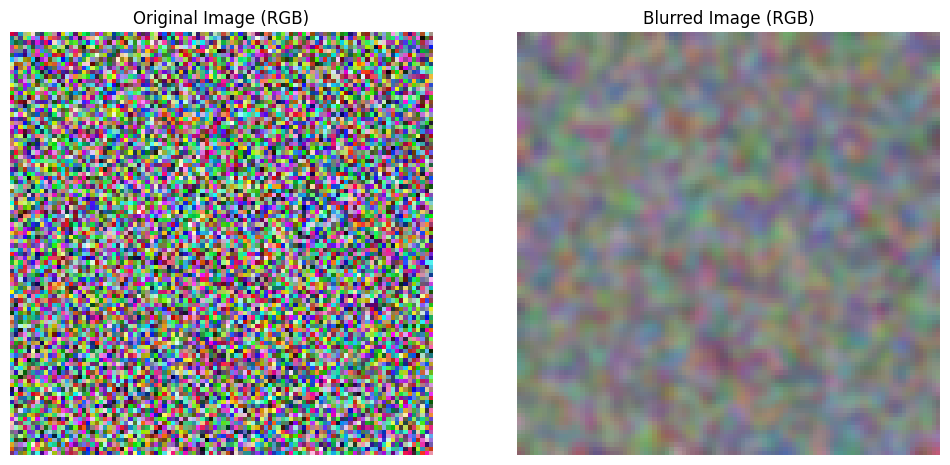

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import tensorflow as tf

def add_gaussian_blur(image, sigma=1):
    """
    Apply Gaussian blur to an image with multiple bands using scipy.
    Each band is processed independently.
    """
    blurred_image = np.zeros_like(image)
    for i in range(image.shape[-1]):  # Process each channel independently
        blurred_image[:, :, i] = gaussian_filter(image[:, :, i], sigma=sigma)
    return blurred_image

# Generate a synthetic 4-band image (e.g., 100x100 pixels, with RGB and NIR channels)
image_size = (100, 100, 4)  # Width, Height, Bands
synthetic_image = np.random.rand(*image_size).astype(np.float32)

# Apply Gaussian blur
blurred_image = add_gaussian_blur(synthetic_image, sigma=1.5)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(synthetic_image[:, :, :3])  # Show only the RGB channels of the original
ax[0].set_title('Original Image (RGB)')
ax[0].axis('off')

ax[1].imshow(blurred_image[:, :, :3])  # Show only the RGB channels of the blurred
ax[1].set_title('Blurred Image (RGB)')
ax[1].axis('off')

plt.show()
